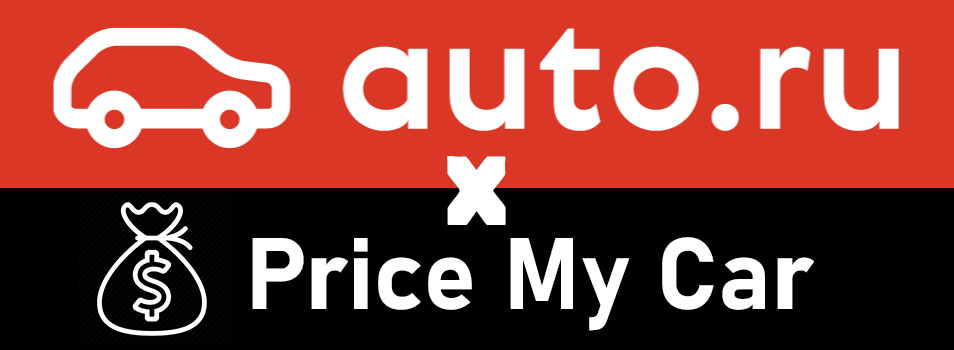

<h1><center>Welcome to the Price My Car!</center></h1>


This is regression model, that you can depend on when you want to sell your car or buy a new one.

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<div style="text-align: right"> Training data is gaining from a popular auto marketplace in Russia named "Auto.ru"</div>
<div style="text-align: right"> this is a project of one of the biggest company in Russian Federation names "Yandex"</div>

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



# Summary

* [Data Loading from "auto.ru"](#Data-Loading-from-"auto.ru")
* [Data Preprocessing, Explaration and Spliting](#Data-Preprocessing,-Explaration-and-Spliting)
* [EDA and work with NaN values](#EDA-and-work-with-NaN-values)

# <center>Data Loading from "auto.ru"</center>

In [5]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import warnings
from bs4 import BeautifulSoup
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

warnings.filterwarnings('ignore')

training_data = pd.read_csv('training_data.csv')

# <center>Data Preprocessing, Explaration and Spliting</center>

Данные загружены. Необходимо исследовать их и подготовить к обучению.

In [6]:
training_data['Цена (рубли)'] = training_data['Цена (рубли)'].replace('Not price rub', np.nan)
training_data['Цена (рубли)'] = training_data['Цена (рубли)'].astype(float)
training_data['Количество владельцев'] = training_data['Количество владельцев'].replace('The number of owners is not specified', np.nan)
training_data['Количество владельцев'] = training_data['Количество владельцев'].astype(float)

## EDA and work with NaN values

In [7]:
training_data.head()

,Доступность,Категория,Цвет,Описание,Таможня,Лицензия,Количество владельцев,PTS,VIN,Vin разрешение,...,Комплектация,Оборудование,Производитель,Затраты_владельца,Класс_автомобиля,Имя_автомобиля,Объем_багажника,Марка_автомобиля,Модель автомобиля,Информация
0,IN_STOCK,cars,FAFBFB,"Машина в состоянии новой, на порогах и ручке ...",True,******|99,3.0,ORIGINAL,WDC**************,OK,...,"{'id': '0', 'name': ''}","{'cruise-control': True, 'body-kit': True, 'wh...",EUROPEAN,"{'transport_tax': {'tax_by_year': 45900, 'year...",Not class auto,Внедорожник 5 дв.,Not trunk volume min,Mercedes-Benz,M-Класс,"3.5 AT (306 л.с.), внедорожник, полный, бензин"
1,IN_STOCK,cars,200204,"ПТС оригинал, в ДТП не участвовала. Фактически...",True,Not license plate,1.0,ORIGINAL,WDD**************,UNKNOWN,...,"{'id': '0', 'name': ''}","{'cruise-control': True, 'asr': True, 'tinted-...",EUROPEAN,"{'transport_tax': {'tax_by_year': 8840, 'year'...",Not class auto,Седан,Not trunk volume min,Mercedes-Benz,E-Класс,"2.1d MT (136 л.с.), седан, задний, дизель"
2,IN_STOCK,cars,FAFBFB,Not description,True,******|750,4.0,ORIGINAL,WDD**************,OK,...,"{'id': '0', 'name': ''}","{'cruise-control': True, 'tinted-glass': True,...",EUROPEAN,"{'transport_tax': {'tax_by_year': 10200, 'year...",Not class auto,Купе-хардтоп,Not trunk volume min,Mercedes-Benz,E-Класс,"1.8 AT (204 л.с.), купе-хардтоп, задний, бензин"
3,IN_STOCK,cars,040001,КОМПЛЕКТАЦИЯ SOLO-VISION\nПОЛНОСТЬЮ СЕРТИФИЦИР...,True,Not license plate,NaN,Not PTS,W1V**************,Not vin resolution,...,"{'id': '23040720', 'name': 'SOLO-Vision', 'ava...","{'asr': True, 'tinted-glass': True, 'roller-bl...",EUROPEAN,"{'transport_tax': {'tax_by_year': 10450, 'year...",Not class auto,Минивэн L,Not trunk volume min,Mercedes-Benz,V-Класс,"2.0d AT (190 л.с.), минивэн, задний, дизель"
4,IN_STOCK,cars,040001,Фактических 2 владельца. Первый владелец неско...,True,Not license plate,2.0,ORIGINAL,WDD**************,UNKNOWN,...,"{'id': '0', 'name': ''}","{'cruise-control': True, 'asr': True, 'tinted-...",EUROPEAN,"{'transport_tax': {'tax_by_year': 11050, 'year...",Not class auto,Седан,Not trunk volume min,Mercedes-Benz,E-Класс,"2.1d MT (170 л.с.), седан, задний, дизель"


In [8]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51146 entries, 0 to 51145
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Доступность            51146 non-null  object 
 1   Категория              51146 non-null  object 
 2   Цвет                   51146 non-null  object 
 3   Описание               51146 non-null  object 
 4   Таможня                51146 non-null  bool   
 5   Лицензия               51146 non-null  object 
 6   Количество владельцев  36904 non-null  float64
 7   PTS                    51146 non-null  object 
 8   VIN                    51146 non-null  object 
 9   Vin разрешение         51146 non-null  object 
 10  Год                    51146 non-null  float64
 11  Цена (рубли)           50993 non-null  float64
 12  Цена (евро)            51146 non-null  object 
 13  Цена (доллары)         51146 non-null  object 
 14  С салона               51146 non-null  object 
 15  Ко

В столбце "Количество владельцев" достаточно много пропущенных значений. Проверим, что это за объявления. Вполне вероятно, что это "новые" автомобили.

In [9]:
training_data[training_data['Количество владельцев'].isnull()]['Секция'].value_counts()

new     14240
used        2
Name: Секция, dtype: int64

Верно, автомобили без владельцев - новые автомобили. Избавимся от 2 б/у автомобилей без владельцев. А у новых автомобилей проставим 0.

In [10]:
training_data.drop(training_data[(training_data['Количество владельцев'].isnull()) & (training_data['Секция'] == 'used')].index,
                  axis=0, inplace=True)
training_data['Количество владельцев'] = training_data['Количество владельцев'].fillna(0)

Также избавимся от объявлений, где не указана цена в рублях.

In [11]:
training_data.drop(training_data[training_data['Цена (рубли)'].isnull()].index, axis=0, inplace=True)

In [12]:
print('Количество строк в датасете:', training_data.shape[0])

Количество строк в датасете: 50991


<b>Теперь исследуем каждый показатель, обработаем его и определим, будем ли мы использовать его в модели. Для удобства разработаем функцию, которая будет выводить нам значения показателя и тип данных.</b>

In [13]:
def desc_feature(df, feature_name):
    vals = df[feature_name].value_counts()
    print('Тип показателя: {}'.format(df[feature_name].dtypes))
    for val in vals.index:
        print('Показатель имеет значения "{}", количество значений: {}'.format(val, vals[vals.index == val].values[0]))

### Доступность

In [14]:
desc_feature(training_data, 'Доступность')

Тип показателя: object
Показатель имеет значения "IN_STOCK", количество значений: 47322
Показатель имеет значения "ON_ORDER", количество значений: 3669


<b>Вывод:</b>Показатель "Доступность" говорит о наличии автомобиля в данный момент. Данный показатель мы будем использовать в модели. Для его обработки используем One Hot Encoding.

### Категория

In [15]:
desc_feature(training_data, 'Категория')

Тип показателя: object
Показатель имеет значения "cars", количество значений: 50991


<b>Вывод:</b> Данный показатель не несет особого смысла. От него мы избавимся.

In [16]:
training_data.drop('Категория', axis=1, inplace=True)

### Цвет

In [17]:
desc_feature(training_data, 'Цвет')

Тип показателя: object
Показатель имеет значения "040001", количество значений: 12979
Показатель имеет значения "FAFBFB", количество значений: 11009
Показатель имеет значения "97948F", количество значений: 7536
Показатель имеет значения "0000CC", количество значений: 5249
Показатель имеет значения "CACECB", количество значений: 4886
Показатель имеет значения "EE1D19", количество значений: 2502
Показатель имеет значения "200204", количество значений: 2377
Показатель имеет значения "007F00", количество значений: 1249
Показатель имеет значения "C49648", количество значений: 1022
Показатель имеет значения "22A0F8", количество значений: 605
Показатель имеет значения "FFD600", количество значений: 429
Показатель имеет значения "FF8649", количество значений: 407
Показатель имеет значения "660099", количество значений: 274
Показатель имеет значения "4A2197", количество значений: 239
Показатель имеет значения "DEA522", количество значений: 220
Показатель имеет значения "FFC0CB", количество знач

<b>Вывод:</b> Цветов автомобиля достаточно много, на данный момент непонятно, насколько он влияет на стоимость автомобиля. Но я считаю, что данный показатель стоит оставить, обработаем его с помощью Ordinal Encoder с заменой неизвестных значений.

### Описание

In [18]:
training_data.head(3)['Описание']

0    Машина в состоянии новой, на порогах и  ручке ...
1    ПТС оригинал, в ДТП не участвовала. Фактически...
2                                      Not description
Name: Описание, dtype: object

Описание содержит комментарий продавца, на данный момент попробуем извлечь полезную информацию, например срочная ли это продажа или нет. Создадим функцию для извлечения нового признака "quickly", который будет означать срочность продажи автомобиля.

In [19]:
def search_quickly(text):
    if 'срочно' in text.lower():
        return 1
    else:
        return 0

training_data['quickly'] = training_data['Описание'].apply(search_quickly)

Теперь проверим, действительно ли ниже цена у тех автомобилей, которые продают срочно.

In [20]:
print('Медианная цена автомобиля при срочной продаже: {:.0f} руб.' \
      .format(training_data[training_data['quickly'] == 1]['Цена (рубли)'].mean()))
print('Медианная цена автомобиля при срочной продаже: {:.0f} руб.' \
      .format(training_data[training_data['quickly'] == 0]['Цена (рубли)'].mean()))

Медианная цена автомобиля при срочной продаже: 1277462 руб.
Медианная цена автомобиля при срочной продаже: 2306992 руб.


Возможно новый признак окажется полезным. Также попробуем извлечь новый признак "issues", который будет означать наличие поломок у автомобиля, который продается.

In [21]:
def search_issues(text):
    if 'проблема' in text.lower() or 'сломан' in text.lower() or 'не работает' in text.lower() or 'сломался' in text.lower() or 'сломалось' in text.lower():
        return 1
    else:
        return 0

training_data['issues'] = training_data['Описание'].apply(search_issues)

In [22]:
print('Средняя цена автомобиля с поломкой:',
      training_data[training_data['issues'] == 1]['Цена (рубли)'].mean(),
     'рублей')
print('Средняя цена автомобиля без поломок:',
      training_data[training_data['issues'] == 0]['Цена (рубли)'].mean(),
     'рублей')

Средняя цена автомобиля с поломкой: 603138.832997988 рублей
Средняя цена автомобиля без поломок: 2295482.433556462 рублей


Средняя цена автомобиля с поломкой значительно ниже чем у исправных авто. Возможно новый признак окажется полезным.

<b>Вывод:</b> Выявлено 2 новых признака из описания: срочная продажа и поломки.

In [23]:
training_data.drop('Описание', axis=1, inplace=True)

### Таможня

In [24]:
desc_feature(training_data, 'Таможня')

Тип показателя: bool
Показатель имеет значения "True", количество значений: 50991


<b>Вывод:</b> Признак показывает, растаможен ли автомобиль. Все автомобили в наших данных растаможены. Мы не будем использовать данный показатель, так как мы рассматриваем автомобили, которые продаются на территории РФ, и, как правило, они всегда растаможены.

In [25]:
training_data.drop('Таможня', axis=1, inplace=True)

### Лицензия

In [26]:
desc_feature(training_data.head(5), 'Лицензия')

Тип показателя: object
Показатель имеет значения "Not license plate", количество значений: 3
Показатель имеет значения "******|99", количество значений: 1
Показатель имеет значения "******|750", количество значений: 1


In [27]:
print('Кол-во автомобилей без номеров:', len(training_data[training_data['Лицензия'] == 'Not license plate']))

Кол-во автомобилей без номеров: 27210


Данный признак означает "номерной знак", из него можно получить достаточно важные данные: Указан ли номерной знак.

Бывает и такое, что владельцы авто не указывают номерной знак авто, так как пытаются что-то скрыть, учтём этот момент.

Будем использовать данный признак как булево значение.

Если автомобиль без номерного знака новый, значит поставим ему "new", а если автомобиль б/у и у него нет номерного знака, проставим "missed".

27 тысяч авто не имеют номера, рассмотрим их поподробнее. Для начала посмотрим, не новые ли это автомобили?

In [28]:
training_data[training_data['Лицензия'] == "Not license plate"]['Секция'].value_counts()

new     14240
used    12970
Name: Секция, dtype: int64

Из 27 тысяч авто без номерного знака всего 14 тысяч это новые автомобили, а 13 тысяч это б/у автомобили. Обработаем значения и выведем новый признак для нашего датасета.

In [29]:
training_data.loc[(training_data['Лицензия'] == "Not license plate") & (training_data['Секция'] == 'new'), 'Лицензия'] = 'new'

In [30]:
training_data.loc[(training_data['Лицензия'] == "Not license plate") & (training_data['Секция'] == 'used'), 'Лицензия'] = 'missed'

Новые значения проставлены, теперь извлечем новый признак: Указан ли номерной знак

In [31]:
def license_feature(license):
    if license == 'missed':
        return 0
    else:
        return 1

In [32]:
training_data['license_sign'] = training_data['Лицензия'].apply(license_feature)

<b>Вывод:</b> Из признака "Лицензия" выведен признак "указан ли номерной знак". Больше признак "Лицензия" нам не понадобится.

In [33]:
training_data.drop('Лицензия', axis=1, inplace=True)

### Количество владельцев

<b>Вывод:</b> Данный признак я обработал выше. Для новых автомобилей значение этого признака проставлено 0, а б/у автомобили без количества владельцев были выброшены из датасета (таких всего 2).

### PTS

In [34]:
desc_feature(training_data, 'PTS')

Тип показателя: object
Показатель имеет значения "ORIGINAL", количество значений: 46214
Показатель имеет значения "DUPLICATE", количество значений: 4607
Показатель имеет значения "Not PTS", количество значений: 170


170 автомобилей без ПТС, этот документ обязателен. Проверим, что это за автомобили.

In [35]:
training_data[training_data['PTS'] == 'Not PTS']['Секция'].value_counts()

new     169
used      1
Name: Секция, dtype: int64

169 авто это новые автомобили, заменим для них значения данного признака на "ORIGINAL", так как это новые автомобили и ПТС у них будет в любом случае оригинальный. А 1 б/у автомобиль выбросим из датасета.

In [36]:
training_data.drop(training_data[(training_data['PTS'] == 'Not PTS') & (training_data['Секция'] == 'used')].index, axis=0,
                  inplace=True)

In [37]:
training_data.loc[(training_data['PTS'] == 'Not PTS') & (training_data['Секция'] == 'new'), 'PTS'] = 'ORIGINAL'

<b>Вывод:</b> Данный показатель мы будем использовать в модели, это будет булево значение.

### VIN

In [38]:
desc_feature(training_data.sample(5), 'VIN')

Тип показателя: object
Показатель имеет значения "Z94**************", количество значений: 1
Показатель имеет значения "XW8**************", количество значений: 1
Показатель имеет значения "JMY**************", количество значений: 1
Показатель имеет значения "X7L**************", количество значений: 1
Показатель имеет значения "XWE**************", количество значений: 1


In [39]:
print('Кол-во автомобилей без ВИН номера:', len(training_data[training_data['VIN'] == 'Not VIN']))

Кол-во автомобилей без ВИН номера: 2902


Разумеется, дла каждого авто ВИН-номер уникален. Но, мы видим 2902 автомобиля без ВИН номера. Пожалуй, выведем из данного признака новый признак: "Есть ли ВИН-номер".

ВИН-номер должен быть даже у новых автомобилей. Но, если у новых автомобилей он не указан, то, возможно, автомобиль на "предзаказе" и еще не изготовлен, но для таких объявлений мы заполним данный показатель как "ВИН-номер присутствует".

In [40]:
training_data[training_data['VIN'] == 'Not VIN']['Секция'].value_counts()

new     2703
used     199
Name: Секция, dtype: int64

In [41]:
training_data.loc[(training_data['VIN'] == 'Not VIN') & (training_data['Секция'] == 'used'), 'VIN'] = 'missed'

In [42]:
def vin_feature(vin):
    if vin == 'missed':
        return 0
    else:
        return 1
    
training_data['vin_actual'] = training_data['VIN'].apply(vin_feature)

<b>Вывод:</b> Из данного признака мы вывели новый признак: "Наличие ВИН-номера". Будем использователь его как булево значение. Исходный признак мы использовать не будем.

In [43]:
training_data.drop('VIN', axis=1, inplace=True)

### Vin разрешение

<b>Вывод:</b> Думаю, что пока данный признак мы выбросим.

In [44]:
training_data.drop('Vin разрешение', axis=1, inplace=True)

### Цена (рубли)

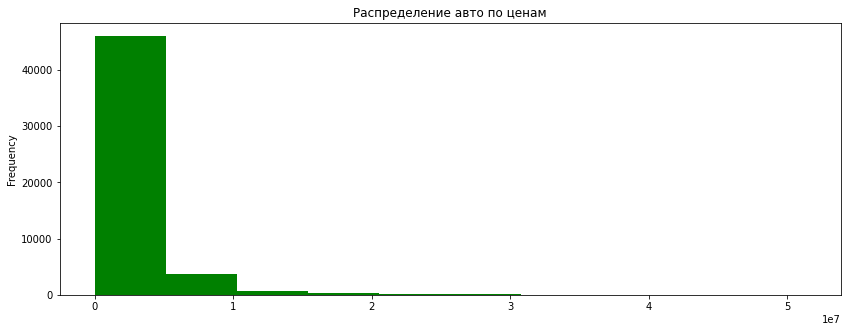

In [45]:
fig, axs = plt.subplots(1, 1, figsize=(14, 5))

training_data['Цена (рубли)'].plot(kind='hist', ax=axs, color='green', title='Распределение авто по ценам');

Большинство автомобилей стоит до 5 млн. рублей.

<b>Вывод:</b> Это целевой признак. Оставим его как есть.

### С салона

In [46]:
desc_feature(training_data, 'С салона')

Тип показателя: object
Показатель имеет значения "Not salon", количество значений: 24149
Показатель имеет значения "True", количество значений: 16435
Показатель имеет значения "False", количество значений: 10406


Показатель имеет значение "Not salon", рассмотрим поподробнее эти авто, возможно это использованные автомобили, которые продают сами владельцы.

In [47]:
training_data[training_data['С салона'] == 'Not salon']['Секция'].value_counts()

used    24149
Name: Секция, dtype: int64

Действительно, так и есть, избавимся от этого значения и проставим данным автомобилям "False".

In [48]:
training_data.loc[training_data['С салона'] == "Not salon", 'С салона'] = "False"

<b>Вывод:</b> Это достаточно важный показатель, так как даже б/у автомобиль может продаваться из салона, и, возможно, это повышает его стоимость.

### Координаты_ширина и Координаты_долгота

<b>Вывод:</b> Координаты нам не пригодятся.

In [49]:
training_data.drop(['Координаты_ширина', 'Координаты_долгота'], axis=1, inplace=True)

### Регион

In [50]:
desc_feature(training_data.sample(10), 'Регион')

Тип показателя: object
Показатель имеет значения "Москва", количество значений: 7
Показатель имеет значения "Тула", количество значений: 1
Показатель имеет значения "Пушкино", количество значений: 1
Показатель имеет значения "Калуга", количество значений: 1


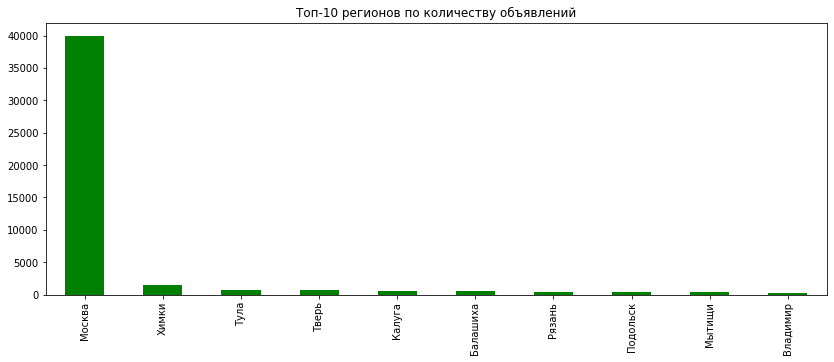

In [51]:
fig, axs = plt.subplots(1, 1, figsize=(14, 5))

training_data['Регион'].value_counts()[:10].plot(kind='bar', ax=axs, color='green', title='Топ-10 регионов по количеству объявлений');

<b>Вывод:</b> Большинство объявлений из Москвы. Данный показатель будет обработан с помощью Ordinal Encoder.

### Временная_зона

<b>Вывод:</b> Показатель "Временная_зона" нам не понадобится.

In [52]:
training_data.drop('Временная_зона', axis=1, inplace=True)

### Пробег

Пожалуй, важнейший показатель, оказывающий влияние на цену автомобиля.

In [53]:
desc_feature(training_data.sample(10), 'Пробег')

Тип показателя: float64
Показатель имеет значения "0.0", количество значений: 3
Показатель имеет значения "234000.0", количество значений: 1
Показатель имеет значения "190000.0", количество значений: 1
Показатель имеет значения "200000.0", количество значений: 1
Показатель имеет значения "69000.0", количество значений: 1
Показатель имеет значения "428000.0", количество значений: 1
Показатель имеет значения "25000.0", количество значений: 1
Показатель имеет значения "313000.0", количество значений: 1


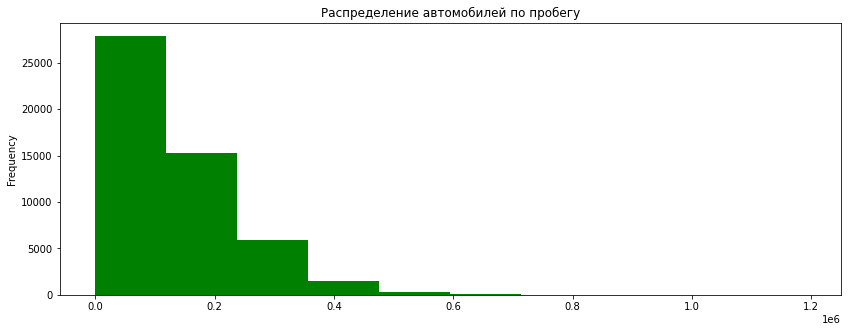

In [54]:
fig, axs = plt.subplots(1, 1, figsize=(14, 5))

training_data['Пробег'].plot(kind='hist', ax=axs, color='green', title='Распределение автомобилей по пробегу');

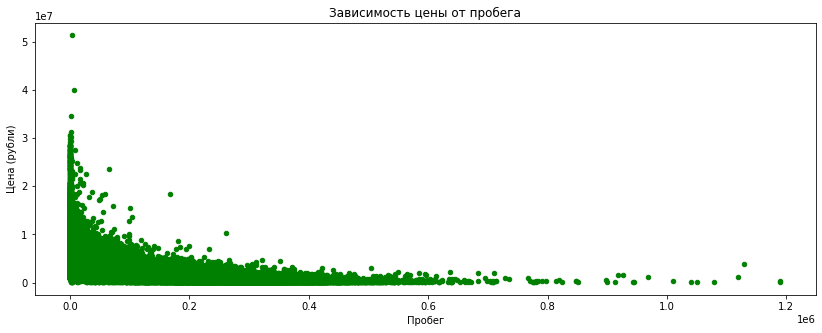

In [55]:
fig, axs = plt.subplots(1, 1, figsize=(14, 5))

training_data.plot(kind='scatter', x='Пробег', y='Цена (рубли)', ax=axs, color='green', title='Зависимость цены от пробега');

<b>Вывод:</b> Имеются даже автомобили миллионики! Выбросов не наблюдается.

### Тип_автомобиля

In [56]:
desc_feature(training_data.sample(5), 'Тип_автомобиля')

Тип показателя: object
Показатель имеет значения "ALLROAD_5_DOORS", количество значений: 3
Показатель имеет значения "SEDAN", количество значений: 2


<b>Вывод:</b> Полезный показатель, который может влиять на стоимость автомобиля. Его мы обработаем с помощью Ordinal Encoder.

### Количество дверей

In [57]:
desc_feature(training_data, 'Количество дверей')

Тип показателя: float64
Показатель имеет значения "5.0", количество значений: 33813
Показатель имеет значения "4.0", количество значений: 15103
Показатель имеет значения "3.0", количество значений: 1040
Показатель имеет значения "2.0", количество значений: 1034


<b>Вывод:</b> Вполне адекватный показатель, который может повлиять на цену автомобиля. Его мы оставим числовым.

### Секция

In [58]:
desc_feature(training_data, 'Секция')

Тип показателя: object
Показатель имеет значения "used", количество значений: 36750
Показатель имеет значения "new", количество значений: 14240


<b>Вывод:</b> Важный показатель, оставим его как есть и затем обработаем его с помощью One Hot Encoding.

### Доп_информация

In [59]:
training_data.loc[0, 'Доп_информация']

"{'hidden': False, 'is_on_moderation': False, 'update_date': '1631548796000', 'creation_date': '1631120232252', 'mobile_autoservices_url': 'https://m.auto.ru/autoservice/all_works/MERCEDES/?geo_id=213', 'hot_info': {'is_hot': False, 'start_time': '2021-09-01T15:01:52Z', 'end_time': '2021-09-01T15:01:52Z'}, 'fresh_date': '1631548663924', 'counters_start_date': '1631120232252', 'chat_only': False, 'dealer_card_promo': 'DONT_SHOW', 'review_summary': {'avg_rating': 4.800000190734863, 'counter': 49}, 'price_stats': {'last_year_price_percentage_diff': -4}, 'booking': {}, 'days_in_stock': 6, 'days_on_sale': 6, 'can_view': False}"

Это очень важные данные, из них можно получить следующие признаки: "Количество дней на продаже", "Рейтинг авто".

Для извлечения новых признаков создадим функцию.

In [60]:
import ast

def extract_rating(dct):
    dct = ast.literal_eval(dct)
    try:
        return dct['review_summary']['avg_rating']
    except:
        return np.nan
    
def extract_days(dct):
    dct = ast.literal_eval(dct)
    try:
        return dct['days_on_sale']
    except:
        return np.nan

In [61]:
training_data['rating_auto'] = training_data['Доп_информация'].apply(extract_rating)
training_data['days_on_sale'] = training_data['Доп_информация'].apply(extract_days)

In [62]:
training_data['rating_auto'].isnull().sum()

3778

In [63]:
training_data[training_data['rating_auto'].isnull()]['Секция'].value_counts()

new     2804
used     974
Name: Секция, dtype: int64

Попробуем заполнить Рейтинг в зависимости от модели автомобиля.

In [64]:
training_data['rating_auto'] = training_data.groupby('Модель автомобиля')['rating_auto'].transform(
    lambda x: x.fillna(x.median()))

In [65]:
training_data['rating_auto'].isnull().sum()

763

In [66]:
training_data[training_data['rating_auto'].isnull()]['Секция'].value_counts()

new     456
used    307
Name: Секция, dtype: int64

Мы избавились от некоторых пропущенных значений. Возможно некоторые модели автомобилей не были подвержены обзору. Попробуем заполнить пропущенные значения в зависимости от марки автомобиля.

In [67]:
training_data['rating_auto'] = training_data.groupby('Марка_автомобиля')['rating_auto'].transform(
    lambda x: x.fillna(x.median()))

In [68]:
training_data['rating_auto'].isnull().sum()

0

Получилось! Теперь все автомобили имеют рейтинг. Проанализируем получившиеся признаки.

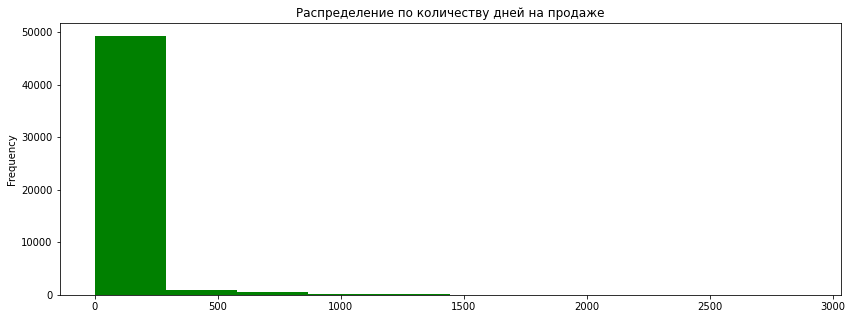

In [69]:
fig, axs = plt.subplots(1, 1, figsize=(14, 5))

training_data['days_on_sale'].plot(kind='hist', ax=axs, color='green', title='Распределение по количеству дней на продаже');

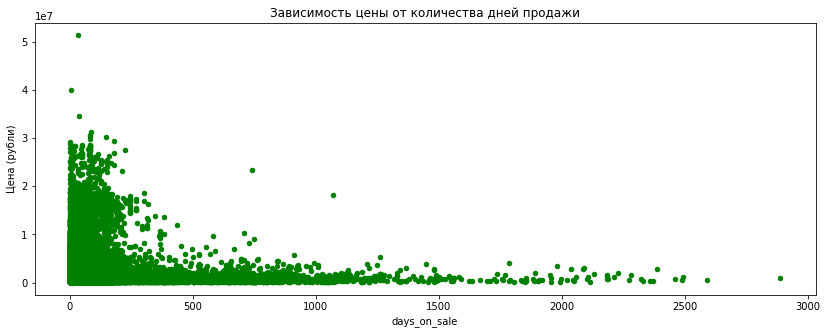

In [70]:
fig, axs = plt.subplots(1, 1, figsize=(14, 5))

training_data.plot(kind='scatter', x='days_on_sale', y='Цена (рубли)', ax=axs, color='green', title='Зависимость цены от количества дней продажи');

Чем дольше продается автомобиль, тем ниже его цена.

Некоторые автомобили продаются невероятно долго! 

<b>При введении пользователем характеристик его автомобиля, разумеется, вряд ли он будет способен ввести такой параметр как количество дней на продаже. Для решения данной проблемы, сначала мы применим модель и посмотрим, насколько данный показатель влияет на результат и что можно будет с ним сделать</b>

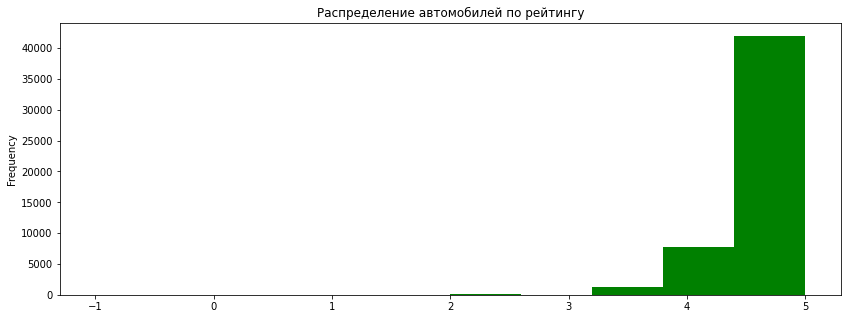

In [71]:
fig, axs = plt.subplots(1, 1, figsize=(14, 5))

training_data['rating_auto'].plot(kind='hist', ax=axs, color='green', title='Распределение автомобилей по рейтингу');

<b>Вывод:</b> Важные признаки были выведены, признак "Доп_информация" нам больше не понадобится.

In [72]:
training_data.drop('Доп_информация', axis=1, inplace=True)

### Актуальность

In [73]:
desc_feature(training_data.sample(2), 'Актуальность')

Тип показателя: object
Показатель имеет значения "{'catboost_relevance_offline': 0.005658734122624728, 'fresh_relevance1': '61890277', 'fresh_date': '1630137634000', 'catboost_relevance_offline_boosted': 0.4713359152453779, 'catboost_meta': ['sortByRealtimeCatboost']}", количество значений: 1
Показатель имеет значения "{'catboost_relevance_offline': 0.004852998305084866, 'fresh_relevance1': '53236122', 'fresh_date': '1630912045000', 'catboost_relevance_offline_boosted': 0.9287159462237731}", количество значений: 1


<b>Вывод:</b> В данном столбце содержится информация об актуальности объявления. Для обучения модели данный показатель нам не понадобится.

In [74]:
training_data.drop('Актуальность', axis=1, inplace=True)

### Комплектация

In [75]:
desc_feature(training_data.sample(2), 'Комплектация')

Тип показателя: object
Показатель имеет значения "{'id': '0', 'name': ''}", количество значений: 2


Из этой информации можно получить данные о комплектации автомобиля. Например, если у автомобиля есть задняя камера, то вероятно он будет дороже, так как такой технологии не делают в дешевых автомобилях.

In [76]:
import ast

def find_rear_camera(dct):
    dct = ast.literal_eval(dct)
    if 'available_options' in dct.keys():
        if 'rear-camera' in dct['available_options']:
            return 1
        else:
            return 0
    else:
        return 0
    
training_data['rear_camera'] = training_data['Комплектация'].apply(find_rear_camera)

In [77]:
print('Средняя цена автомобиля с задней камерой:',
      training_data[training_data['rear_camera'] == 1]['Цена (рубли)'].mean(),
     'рублей')
print('Средняя цена автомобиля без задней камеры:',
      training_data[training_data['rear_camera'] == 0]['Цена (рубли)'].mean(),
     'рублей')

Средняя цена автомобиля с задней камерой: 4078209.3204315426 рублей
Средняя цена автомобиля без задней камеры: 1893864.6158241862 рублей


<b>Вывод:</b> На данный момент был извлечен 1 полезный признак - задняя камера.

In [78]:
training_data.drop('Комплектация', axis=1, inplace=True)

### Оборудование

In [79]:
desc_feature(training_data.sample(1), 'Оборудование')

Тип показателя: object
Показатель имеет значения "{'cruise-control': True, 'esp': True, 'airbag-driver': True, 'electro-window-front': True, 'airbag-passenger': True, 'computer': True, 'seat-transformation': True, 'wheel-power': True, 'lock': True, 'rear-camera': True, 'light-cleaner': True, 'fabric-seats': True, 'electro-mirrors': True, 'electro-window-back': True, 'alloy-wheel-disks': True, 'ptf': True, 'airbag-side': True, 'mirrors-heat': True, 'audiosystem-cd': True, 'abs': True, 'front-seats-heat': True, 'wheel-configuration2': True, 'wheel-configuration1': True, 'immo': True, 'climate-control-1': True}", количество значений: 1


<b>Вывод:</b> В данном столбце содержится информация об оборудовании автомобиля. Пока мы не будем использовать данный признак.

In [80]:
training_data.drop('Оборудование', axis=1, inplace=True)

### Производитель

In [81]:
desc_feature(training_data, 'Производитель')

Тип показателя: object
Показатель имеет значения "EUROPEAN", количество значений: 26267
Показатель имеет значения "JAPANESE", количество значений: 14207
Показатель имеет значения "KOREAN", количество значений: 7180
Показатель имеет значения "AMERICAN", количество значений: 3333
Показатель имеет значения "RUSSIAN", количество значений: 3


<b>Вывод:</b> Данные в столбце показывают Страну производителя автомобиля. Обработаем эти значения с помощью Ordinal Encoder.

### Затраты владельца

In [82]:
desc_feature(training_data.sample(2), 'Затраты_владельца')

Тип показателя: object
Показатель имеет значения "{'transport_tax': {'tax_by_year': 4214, 'year': 2021, 'rid': 1, 'rate': 49, 'horse_power': 86, 'holding_period_month': 12, 'boost': 1}}", количество значений: 1
Показатель имеет значения "{'transport_tax': {'tax_by_year': 49500, 'year': 2021, 'rid': 213, 'rate': 75, 'horse_power': 330, 'holding_period_month': 12, 'boost': 2}, 'osago_insurance': [{'insurance_company': 'TINKOFF', 'price': 6309}]}", количество значений: 1


Это очень важные данные, извлечем из них такие признаки как: "Годовой налог на авто", "Стоимость страховки ОСАГО" и "Лошадинные силы".

In [83]:
import ast

def extract_tax(dct):
    dct = ast.literal_eval(dct)
    try:
        return dct['transport_tax']['tax_by_year']
    except:
        return np.nan
    
def extract_osago(dct):
    dct = ast.literal_eval(dct)
    try:
        return dct['osago_insurance'][0]['price']
    except:
        return np.nan
    
def extract_hp(dct):
    dct = ast.literal_eval(dct)
    try:
        return dct['transport_tax']['horse_power']
    except:
        return np.nan

In [84]:
training_data['tax_by_year'] = training_data['Затраты_владельца'].apply(extract_tax)
training_data['osago_price'] = training_data['Затраты_владельца'].apply(extract_osago)
training_data['horse_power'] = training_data['Затраты_владельца'].apply(extract_hp)

Теперь проверим данные на пропущенные значения и по возможности заполним их.

In [85]:
training_data['tax_by_year'].isnull().sum()

0

In [86]:
training_data['osago_price'].isnull().sum()

18788

In [87]:
training_data['horse_power'].isnull().sum()

552

Стоимость ОСАГО у некоторых авто пропущена. Попробуем заполнить пропущенные значения основываясь на уже имеющихся данных.

In [88]:
training_data['osago_price'] = training_data.groupby(['Марка_автомобиля', 'Модель автомобиля'])['osago_price'].transform(
    lambda x: x.fillna(x.median()))

In [89]:
training_data['osago_price'].isnull().sum()

29

29 автомобилей все равно остались без данного показателя. Для них мы заполним пропущенные значения медианной стоимостью ОСАГО.

In [90]:
training_data['osago_price'] = training_data['osago_price'].fillna(training_data['osago_price'].median())

In [91]:
training_data['osago_price'].isnull().sum()

0

Теперь разберемся с "horse_power" и заполним эти значения основываясь на уже имеющихся данных марке и модели автомобиля.

In [92]:
training_data['horse_power'] = training_data.groupby(['Марка_автомобиля', 'Модель автомобиля'])['horse_power'].transform(
    lambda x: x.fillna(x.median()))

In [93]:
training_data['horse_power'].isnull().sum()

398

Остальные пропущенные значения заполним медианой в зависимости от марки автомобиля.

In [94]:
training_data['horse_power'] = training_data.groupby(['Марка_автомобиля', 'Год'])['horse_power'].transform(
    lambda x: x.fillna(x.median()))

In [95]:
training_data['horse_power'].isnull().sum()

1

In [96]:
training_data['horse_power'] = training_data.groupby(['Марка_автомобиля'])['horse_power'].transform(
    lambda x: x.fillna(x.median()))

In [97]:
training_data['horse_power'].isnull().sum()

0

<b>Вывод:</b> Мы получили новые важные признаки. Пропущенные значения обработаны. Идем дальше.

In [98]:
training_data.drop('Затраты_владельца', axis=1, inplace=True)

### Класс автомобиля

In [99]:
desc_feature(training_data, 'Класс_автомобиля')

Тип показателя: object
Показатель имеет значения "Not class auto", количество значений: 50990


<b>Вывод:</b> Данный признак нам ни о чем не говорит, избавимся от него.

In [100]:
training_data.drop('Класс_автомобиля', axis=1, inplace=True)

### Имя автомобиля

In [101]:
desc_feature(training_data.sample(3), 'Имя_автомобиля')

Тип показателя: object
Показатель имеет значения "Седан", количество значений: 1
Показатель имеет значения "Внедорожник 5 дв.", количество значений: 1
Показатель имеет значения "Универсал 5 дв.", количество значений: 1


<b>Вывод:</b> Данный признак является наиболее детальным описанием типа автомобиля. Нам достаточно признака "Тип автомобиля", поэтому от данного признака мы избавимся.

In [102]:
training_data.drop('Имя_автомобиля', axis=1, inplace=True)

### Объем багажника

In [103]:
desc_feature(training_data, 'Объем_багажника')

Тип показателя: object
Показатель имеет значения "Not trunk volume min", количество значений: 50990


<b>Вывод:</b> Данных об объеме багажника нет, избавимся от этого признака.

In [104]:
training_data.drop('Объем_багажника', axis=1, inplace=True)

### Год

In [105]:
desc_feature(training_data.sample(3), 'Год')

Тип показателя: float64
Показатель имеет значения "2021.0", количество значений: 1
Показатель имеет значения "2006.0", количество значений: 1
Показатель имеет значения "2013.0", количество значений: 1


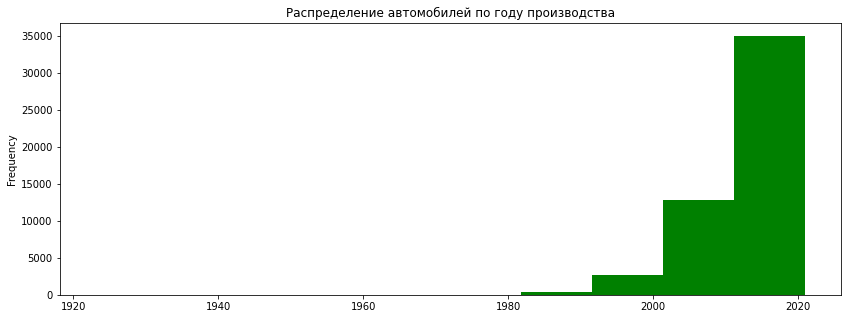

In [106]:
fig, axs = plt.subplots(1, 1, figsize=(14, 5))

training_data['Год'].plot(kind='hist', ax=axs, color='green', title='Распределение автомобилей по году производства');

<b>Вывод:</b> В выборке присутствуют автомобили даже 1920-х годов производства. Считаю, что нужно избавиться от старых автомобилей, оставить только наиболее актуальные на данный момент, допустим, машины только после 1980 года производства.

In [107]:
len(training_data[training_data['Год'] < 1980])

40

In [108]:
training_data = training_data.drop(training_data[training_data['Год'] < 1980].index, axis=0)

In [109]:
training_data = training_data.reset_index(drop=True)

### Марка автомобиля

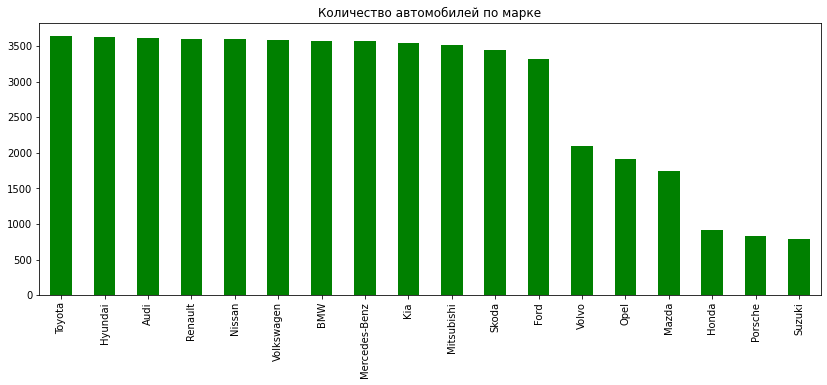

In [110]:
fig, axs = plt.subplots(1, 1, figsize=(14, 5))

training_data['Марка_автомобиля'].value_counts().plot(kind='bar', ax=axs, color='green', title='Количество автомобилей по марке');

<b>Вывод:</b> Достаточно сбалансированное распределение. Идем далее.

### Модель автомобиля

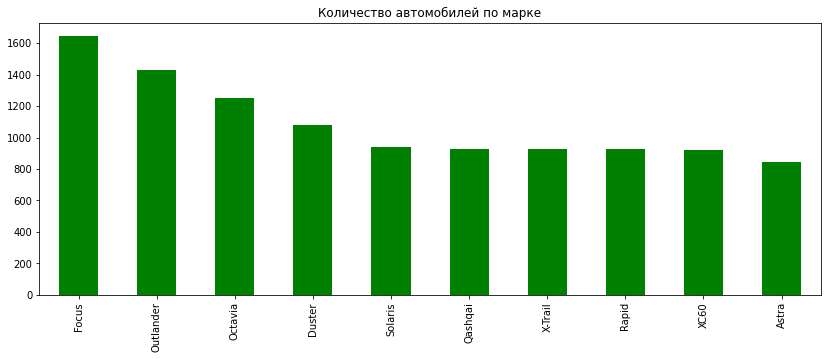

In [111]:
fig, axs = plt.subplots(1, 1, figsize=(14, 5))

training_data['Модель автомобиля'].value_counts()[:10].plot(kind='bar', ax=axs, color='green', title='Количество автомобилей по марке');

<b>Вывод:</b> Наблюдается лидеры рынка, но в целом все равно распределение сбалансированное.

### Информация

In [112]:
desc_feature(training_data.sample(5), 'Информация')

Тип показателя: object
Показатель имеет значения "1.4 AT (100 л.с.), седан, передний, бензин", количество значений: 1
Показатель имеет значения "1.6 MT (102 л.с.), седан, передний, бензин", количество значений: 1
Показатель имеет значения "2.0 AT (258 л.с.), седан, задний, бензин", количество значений: 1
Показатель имеет значения "1.4 MT (110 л.с.), лифтбек, передний, газ", количество значений: 1
Показатель имеет значения "1.6d MT (90 л.с.), седан, передний, дизель", количество значений: 1


Отсюда можно извлечь данные об объеме двигателя и о типе коробки передач.

In [113]:
import re

def extract_volume(info):
    volume = re.sub("[A-Za-z]", "", info)[:3]
    try:
        return float(volume)
    except:
        return 0
    
def extract_gear(info):
    if 'AT' in info:
        gear = 'AT'
    elif 'MT' in info and 'AMT' not in info:
        gear = 'MT'
    elif 'AMT'in info:
        gear = 'AMT'
    else:
        gear = 'Other gear'
    return gear

In [114]:
training_data['engine_volume'] = training_data['Информация'].apply(extract_volume)
training_data['gear_type'] = training_data['Информация'].apply(extract_gear)

In [115]:
training_data['engine_volume'].isnull().sum()

0

In [116]:
training_data['gear_type'].isnull().sum()

0

<b>Вывод:</b> Новые признаки извлечены. "Информация" нам больше не понадобится. Идем дальше.

In [117]:
training_data.drop('Информация', axis=1, inplace=True)

<b>Общий вывод:</b> Данные проанализированы, новые признаки извлечены, теперь перейдем к подготовке данных к обучению.

## Data Preprocessing

In [118]:
training_data.dtypes

Доступность               object
Цвет                      object
Количество владельцев    float64
PTS                       object
Год                      float64
Цена (рубли)             float64
Цена (евро)               object
Цена (доллары)            object
С салона                  object
Регион                    object
Пробег                   float64
Тип_автомобиля            object
Количество дверей        float64
Секция                    object
Производитель             object
Марка_автомобиля          object
Модель автомобиля         object
quickly                    int64
issues                     int64
license_sign               int64
vin_actual                 int64
rating_auto              float64
days_on_sale               int64
rear_camera                int64
tax_by_year                int64
osago_price              float64
horse_power              float64
engine_volume            float64
gear_type                 object
dtype: object

In [119]:
training_data.drop(['Цена (евро)', 'Цена (доллары)'], axis=1, inplace=True)

Пропущенных значений нет. Осталось разбить наши данные на обучающую и тестовую выборки, а затем обработать значения. Также переименуем столбцы в необходимый вид.

In [120]:
training_data.columns

Index(['Доступность', 'Цвет', 'Количество владельцев', 'PTS', 'Год',
       'Цена (рубли)', 'С салона', 'Регион', 'Пробег', 'Тип_автомобиля',
       'Количество дверей', 'Секция', 'Производитель', 'Марка_автомобиля',
       'Модель автомобиля', 'quickly', 'issues', 'license_sign', 'vin_actual',
       'rating_auto', 'days_on_sale', 'rear_camera', 'tax_by_year',
       'osago_price', 'horse_power', 'engine_volume', 'gear_type'],
      dtype='object')

In [121]:
training_data.columns = ['available', 'color', 'owners', 'pts',
       'year', 'price', 'salon', 'region', 'mileage', 'type',
       'doors', 'section', 'country', 'mark', 'model', 'quickly', 'issues',
       'license_sign', 'vin_actual', 'rating_auto', 'days_on_sale', 'rear_camera',
       'tax_by_year', 'osago_price', 'horse_power', 'engine_volume', 'gear_type']

Признаки, которые будут обработаны с помощью OHE, мы обработаем сразу.

In [122]:
training_data = pd.get_dummies(training_data, drop_first=True, columns=['available', 'pts', 'salon',
                                                                        'section', 'gear_type'])

In [135]:
x = training_data.drop('price', axis=1)
y = training_data['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=123)

Данные разделены на выборки. Теперь обработаем данные с помощью Label Encoder.

In [136]:
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
x_valid = x_valid.reset_index(drop=True)
y_valid = y_valid.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [137]:
import logging
import bisect
from sklearn.preprocessing import LabelEncoder

class LabelEncoderRobust(LabelEncoder):
    # We are going to override some of the LabelEncoder's methods
    def __init__(self):
        self.class_type = None

    def fit(self, y):
        # fit LER using the parent LE fit() method
        super().fit(y)

        # get the list of classes
        le_classes = self.classes_.tolist()
        logging.debug("LER classes: {}".format(le_classes))

        # get the type of classes
        if len(le_classes) > 0:
            self.class_type = type(le_classes[0])

        logging.debug("LER classes type: {}".format(self.class_type))

        if self.class_type == str:
            bisect.insort_left(le_classes, 'UNKNOWN_LBL')
        if self.class_type == int:
            bisect.insort_left(le_classes, -999)

        self.classes_ = np.array(le_classes)

    def transform(self, y):

        for i in range(len(y)):
            item = y[i]
            if item not in self.classes_:
                logging.debug("transform LER classes type: {}".format(self.class_type))
                if self.class_type == str:
                    y[i] = 'UNKNOWN_LBL'
                elif self.class_type == int:
                    y[i] = -999
                else:
                    raise ValueError("list_type in None, cannot transform")

        return super().transform(y)

l_enc = LabelEncoderRobust()
cat_cols = training_data.select_dtypes(include='object').columns
for col in cat_cols:
    l_enc.fit(x_train[col])
    x_train[col] = l_enc.transform(x_train[col])
    x_valid[col] = l_enc.transform(x_valid[col])
    x_test[col] = l_enc.transform(x_test[col])

In [138]:
x_train.dtypes.value_counts()

float64    8
int64      7
uint8      7
int32      6
dtype: int64

Данные приведены к числовому типу. Теперь масштабируем их.

In [139]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [140]:
x_train = pd.DataFrame(x_train, columns=x.columns)
x_valid = pd.DataFrame(x_valid, columns=x.columns)
x_test = pd.DataFrame(x_test, columns=x.columns)

In [141]:
x_train.head(3)

,color,owners,year,region,mileage,type,doors,country,mark,model,...,osago_price,horse_power,engine_volume,available_ON_ORDER,pts_ORIGINAL,salon_True,section_used,gear_type_AT,gear_type_MT,gear_type_Other gear
0,1.505398,0.996137,-0.147967,-0.049241,0.021689,-0.933808,0.62675,-0.610292,-1.519474,0.533432,...,1.031161,-0.322623,-0.946588,-0.27702,0.314796,-0.691639,0.623655,-0.873310,1.278651,-0.300413
1,-1.171225,0.996137,-2.850334,-1.249669,4.124976,-1.067437,-2.53786,-0.610292,0.319109,0.207471,...,-0.047720,-0.033929,1.311462,-0.27702,0.314796,-0.691639,0.623655,1.145068,-0.782074,-0.300413
2,1.282346,0.996137,-0.005737,-1.667210,0.655599,-0.933808,0.62675,-0.610292,1.789975,1.585397,...,-0.047720,0.372381,0.307884,-0.27702,0.314796,-0.691639,0.623655,1.145068,-0.782074,-0.300413


Данные обработаны. Перейдем к моделированию.

## Модель

Опробуем несколько моделей без настройки гиперпараметров на валидационной выборке, затем выберем наиболее точную и будем настраивать ее.

In [142]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from tqdm import tqdm

models = [RandomForestRegressor(), DecisionTreeRegressor(), lgb.LGBMRegressor(), LinearRegression(),
         BayesianRidge(), KNeighborsRegressor()]

results = pd.DataFrame(index=[type(model).__name__ for model in models], columns=['mae_score'])

for model in tqdm(models):
    model.fit(x_train, y_train)
    preds = model.predict(x_valid)
    results.loc[type(model).__name__, 'mae_score'] = mean_absolute_error(y_valid, preds)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:44<00:00,  7.45s/it]


Text(0, 500000, 'Топ-2 модели')

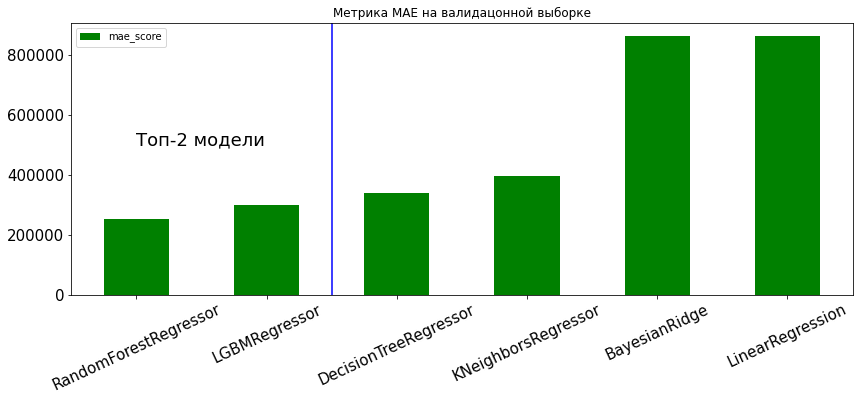

In [169]:
fig, axs = plt.subplots(1, 1, figsize=(14, 5))
results.sort_values(by='mae_score', ascending=True).plot(kind='bar', ax=axs, color='green', rot=25);
axs.set_title('Метрика МАЕ на валидацонной выборке')
axs.tick_params(axis='both', labelsize=15)
axs.axvline(x=1.5, color='blue')
axs.text(x=0, y=500000, s='Топ-2 модели', fontsize=18)

Наиболее точные модели: Random Forest и LightGBM

Настроим гиперпараметры для модели LightGBM

In [179]:
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)
#lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)

params = {
    'boosting_type': 'dart',
    'max_depth': 50,
    'max_bin': 5000,
    'objective': 'regression',
    'metric': {'mean_absolute_error'},
    'num_leaves': 200,
    'min_gain_to_split': 0.2,
    'min_sum_hessian_in_leaf': 1,
    'min_data_in_leaf': 1,
    'learning_rate': 0.4,
    'feature_fraction': 0.9,
    'bagging_fraction': 1,
    'bagging_freq': 2,
    'num_iterations': 500,
    'verbose': 1
}

print('Training LightGBM model...')

gbm = lgb.train(params,
                lgb_train,
                num_boost_round=10,
                valid_sets=lgb_eval,
                early_stopping_rounds=20,
                verbose_eval=False)

print('Training is done.')
print('-'*90)
print('Validation LightGBM model...')
print('-'*90)
print('Validate LightGBM model metrics:')
predictions_valid = gbm.predict(x_test, num_iteration=gbm.best_iteration)
rmse_valid = mean_squared_error(y_test, predictions_valid) ** 0.5
print('The RMSE of prediction is: {:.2f}'.format(rmse_valid))
print('The MAE of prediction is: {:.2f}'.format(mean_absolute_error(y_test, predictions_valid)))

Training LightGBM model...
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3950
[LightGBM] [Info] Number of data points in the train set: 40760, number of used features: 28
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 2286943.326791
Training is done.
------------------------------------------------------------------------------------------
Validation LightGBM model...
------------------------------------------------------------------------------------------
Validate LightGBM model metrics:
The RMSE of prediction is: 483206.14
The MAE of prediction is: 236630.18


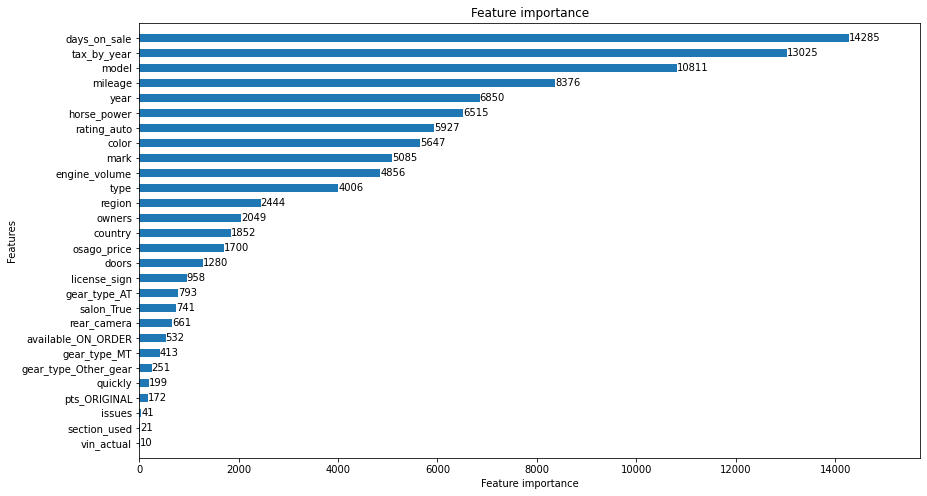

In [180]:
fig, axs = plt.subplots(1, 1, figsize=(14, 8))
lgb.plot_importance(gbm, ax=axs, height=0.5, grid=False);

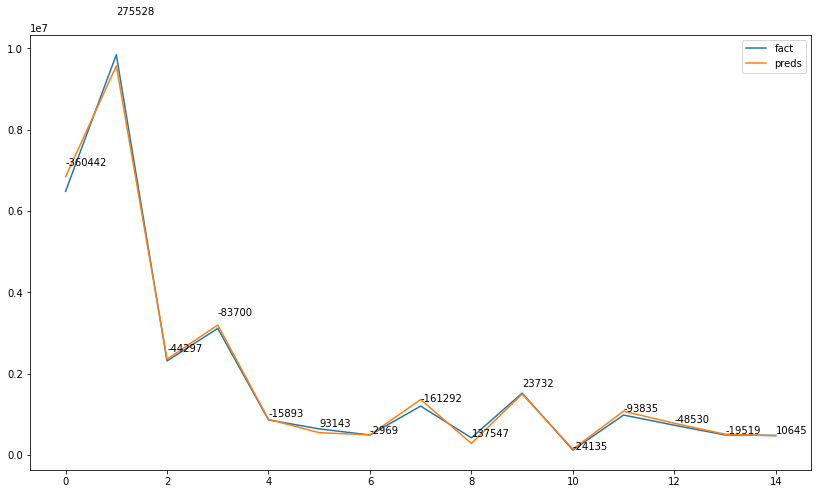

In [183]:
fig, axs = plt.subplots(1, 1, figsize=(14, 8))

df = pd.DataFrame({'fact': y_test[:15].values, 'preds': np.round(predictions_valid[:15], 2)})
df.plot(ax=axs);
for i in range(len(df)):
    axs.text(x=i, y=df.loc[i, 'fact'] * 1.1, s='{:.0f}'.format(np.round(df.loc[i, 'fact'] - df.loc[i, 'preds'])))

## Адекватность модели

In [14]:
fiction = pd.Series()
for row in range(target_valid.shape[0]):
    fiction.loc[row] = target_valid.median()
fiction_test = pd.Series()
for row in range(target_test.shape[0]):
    fiction_test.loc[row] = target_test.median()

print('MAE на валидационной выборке:', mean_absolute_error(fiction, target_valid))
print('MAE на тестовой выборке:', mean_absolute_error(fiction_test, target_test))

MAE на валидационной выборке: 988704.9362174154
MAE на тестовой выборке: 982470.5393040344


Метрика MAE при заполнении цен средним значением составила примерно 988000, это говорит о том, что все модели прошли тест на адекватность.

## Ввод данных для оценки

In [24]:
owners = input('Введите количество владельцев (целое число): ')
year = input('Введите год выпуска автомобиля (целое число): ')
dealer = input('Продажа автомобиля от салона (да) или от собственника (нет): ')
if dealer == 'да':
    dealer = True 
else: 
    dealer = False
region = input('Введите регион продажи автомобиля: ')
mileage = input('Введите пробег автомобиля в километрах (целое число): ')
section = input('Автомобиль новый (да) или б/у (нет): ')
if section == 'да':
    section = 'new'
else:
    section = 'used'
vendor = input('Введите страну производства (JAPANESE, EUROPEAN, KOREAN, AMERICAN, RUSSIAN): ')
body_type = input('Введите тип кузова авто (Внедорожник 5 дв., Седан, Купе, Лифтбек, Минивэн, Хэтчбэк 5 дв., Родстер, Универсал 5 дв., Кабриолет, Хэтчбэк 3 дв.): ')
mark = input('Введите марку авто (Mercedes-Benz, BMW, Hyundai, Kia, Volkswagen, Toyota, Nissan, Renault, Audi, Suzuki, Opel, Skoda, Volvo, Mazda, Ford, Mitsubishi, Honda, Porsche): ')
model = input('Введите модель авто: ')

Введите количество владельцев (целое число): 2
Введите год выпуска автомобиля (целое число): 2007
Продажа автомобиля от салона (да) или от собственника (нет): нет
Введите регион продажи автомобиля: Москва
Введите пробег автомобиля в километрах (целое число): 100000
Автомобиль новый (да) или б/у (нет): нет
Введите страну производства (JAPANESE, EUROPEAN, KOREAN, AMERICAN, RUSSIAN): JAPANESE
Введите тип кузова авто (Внедорожник 5 дв., Седан, Купе, Лифтбек, Минивэн, Хэтчбэк 5 дв., Родстер, Универсал 5 дв., Кабриолет, Хэтчбэк 3 дв.): Седан
Введите марку авто (Mercedes-Benz, BMW, Hyundai, Kia, Volkswagen, Toyota, Nissan, Renault, Audi, Suzuki, Opel, Skoda, Volvo, Mazda, Ford, Mitsubishi, Honda, Porsche): Toyota
Введите модель авто: Camry


In [32]:
trying = pd.DataFrame({'owners': owners, 'year': year, 'dealer': dealer, 'region': region, 'mileage': mileage,
              'section': section, 'vendor': vendor, 'body_type': body_type, 'mark': mark, 'model': model}, index=[1])
trying[num_cols] = scaler.transform(trying[num_cols])
d = pd.get_dummies(trying, columns=['dealer', 'region', 'section', 'vendor', 'body_type', 'mark', 'model'])
m = features_test.merge(d, how='outer')
m.loc[7213]
predictions_new = gbm.predict(m.loc[7213])

print('Примерная цена вашего автомобиля составляет: {:.0f} руб.'.format(predictions_new[0]))

Примерная цена вашего автомобиля составляет: 864501 руб.


Похожий по характеристикам автомобиль на auto.ru

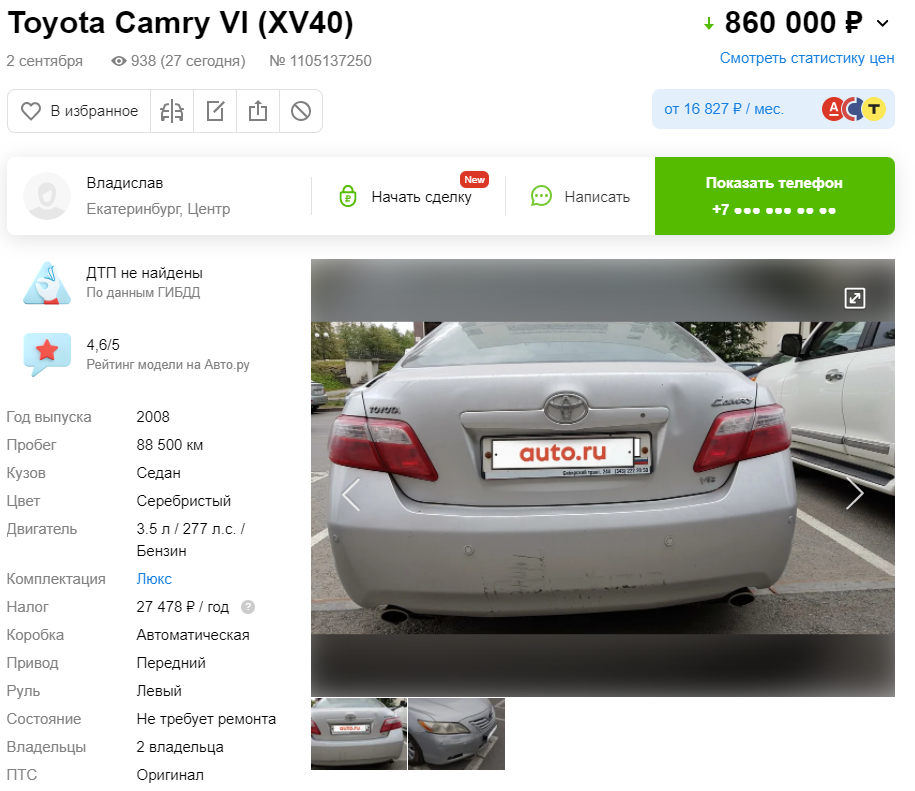